<a href="https://colab.research.google.com/github/saadkarim165/ObjectDetectionProject/blob/main/ObjectDetection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%markdown
#Object Detection Model

#Object Detection Model


In [2]:
%%markdown 
## Importing Dependencies

## Importing Dependencies


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random
import shutil as sh

from tqdm.auto import tqdm
from PIL import Image
from google.colab.patches import cv2_imshow

In [5]:
!unzip /Vehicles-OpenImages.v1-416x416.yolokeras.zip

Archive:  /Vehicles-OpenImages.v1-416x416.yolokeras.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg  
 extracting: test/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg  
 extracting: test/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg  
 extracting: test/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg  
 extracting: test/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg  
 extracting: test/08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg  
 extracting: test/10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg  
 extracting: test/10c26c6598677a1f_jpg.rf.f72b2b91e750909f68fffeee777e9350.jpg  
 extracting: test/1ef77c61856d3b4b_jpg.rf.HZMSiUVx3WUcMIooJMZX.jpg  
 extracting: test/1ef77c61856d3b4b_jpg.rf.a528f50763101224fad39907062c5026.jpg  
 extracting: test/259ff749ac781352_jpg.rf.8acc4aba3916d2dd58c3acca8890194b.jpg  
 extracting: test/

In [50]:
train_dir   = "/content/train"
test_dir    = "/content/test"
valid_dir   = "/content/valid"

print('Image(train): ', len(os.listdir(train_dir)))
print('Image(test): ', len(os.listdir(test_dir)))

Image(train):  880
Image(test):  128


In [7]:
data = pd.read_csv("/content/train/_annotations.txt",header=None,delimiter='\t')
max_length=0
for i,j in data.iterrows():
  if len(j[0].split(' '))>max_length:
    max_length=len(j[0].split(' '))
  else:
    continue
print(max_length)

10


In [8]:
# data=data.rename(columns={0: 'ImageName', 1: 'xmin',2: 'ymin',3: 'xmax',4: 'ymax',5: 'xmin2',6: 'ymin2',7: 'xmax2',8: 'ymax2'})

In [9]:
# data.iloc[217][0]

In [10]:
print(data.shape)
data.nunique()

(878, 1)


0    878
dtype: int64

(416, 416, 3)


True

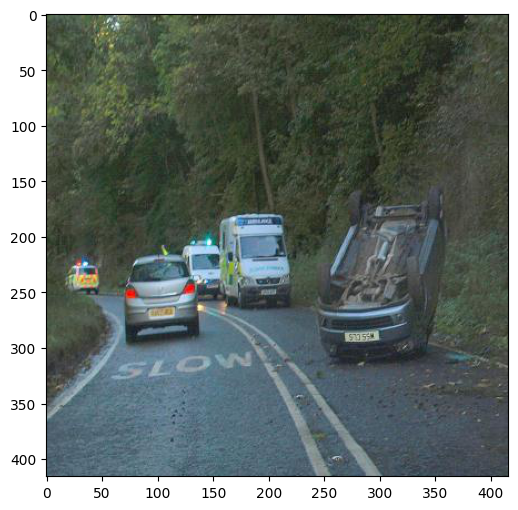

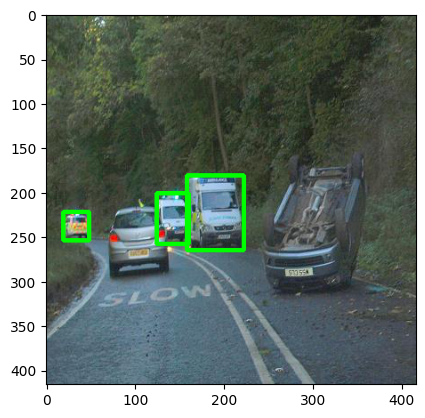

In [11]:
IMAGE_SHAPE = 0
points={}
points1={}
rand = 217
random_row = data.iloc[rand]
rand_list= random_row[0]
image = plt.imread(train_dir +'/'+ rand_list.split(' ')[0])
plt.figure(figsize=(8,6))
plt.imshow(image)
IMAGE_SHAPE = image.shape
print(image.shape)
list_values=rand_list.split(' ')
for i in range(1,len(list_values)):
  pnts=list_values[i].split(',')[:4]
  # print(pnts)
  points["point{0}".format(i)] = int(pnts[0]), int(pnts[1])
  points1["point{0}".format(i)] = int(pnts[2]), int(pnts[3])
# print(points)
for i,j in enumerate(points):
  cv2.rectangle(image,points[j], points1[j], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point2'], points1['point2'], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point3'], points1['point3'], color=(0, 255, 0), thickness=3)
plt.figure()
plt.imshow(image)
points['point2']==(124,201)

In [12]:
points

{'point1': (19, 222), 'point2': (124, 201), 'point3': (158, 181)}

(416, 416, 3)
(416, 416, 3)
(416, 416, 3)
(416, 416, 3)


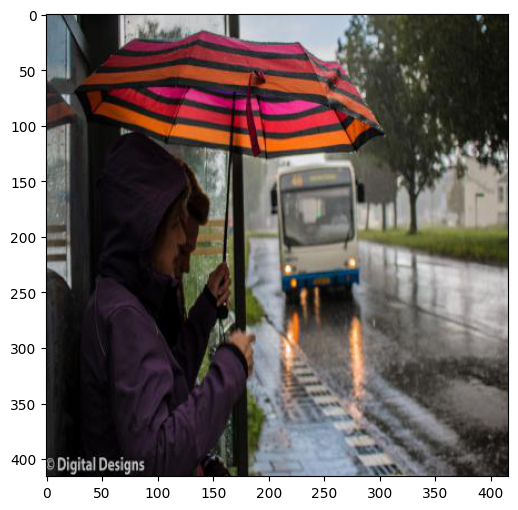

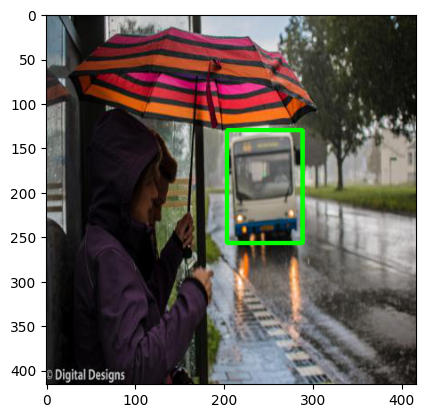

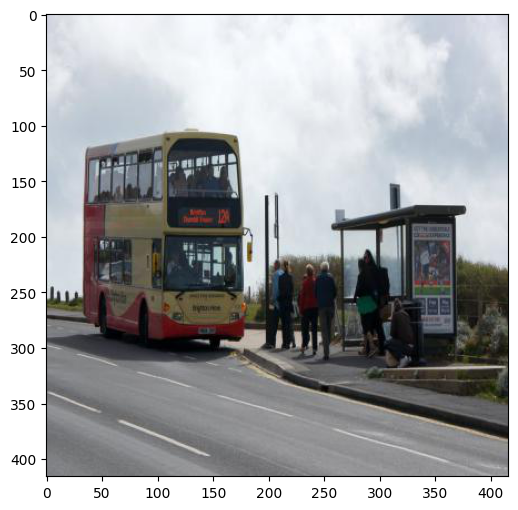

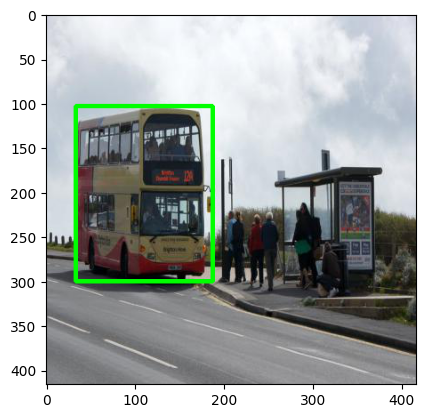

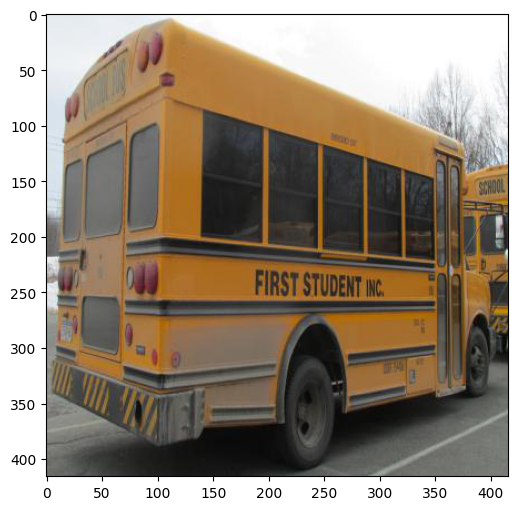

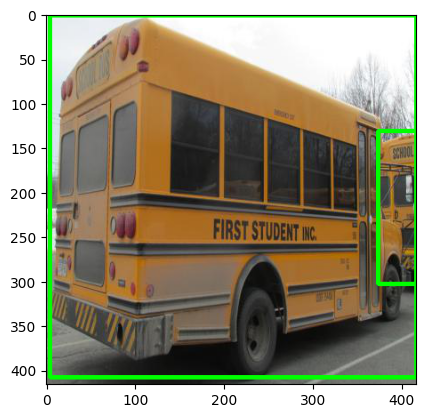

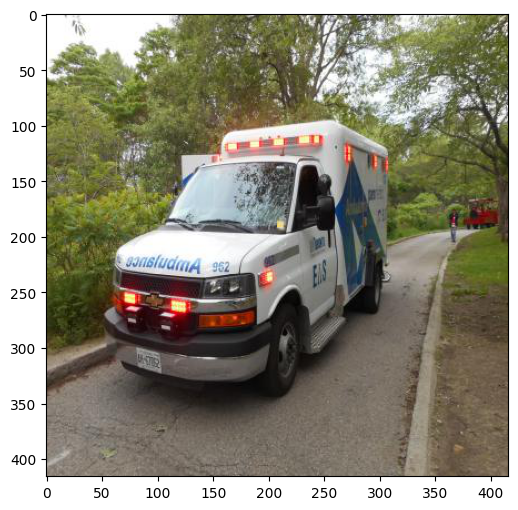

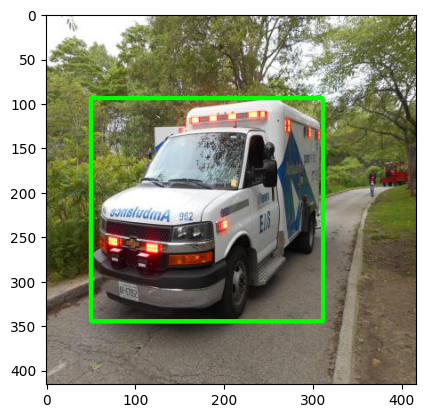

In [13]:
# IMAGE_SHAPE = 0
# for i in range(4):
#     rand = np.random.randint(0, data.shape[0])
#     random_row = data.iloc[rand]
#     image = plt.imread(train_dir +'/'+ random_row[0])
#     plt.figure()
#     plt.imshow(image)
#     IMAGE_SHAPE = image.shape
#     print(image.shape)
#     print('Name,xmin,ymin,xmax,ymax:',random_row)
#     point1 = (int(random_row[1]), int(random_row[2]))
#     point2 = (int(random_row[3]), int(random_row[4]))
#     cv2.rectangle(image, point1, point2, color=(0, 255, 0), thickness=3)
#     plt.figure()
#     plt.imshow(image)

IMAGE_SHAPE = 0
for i in range(4):
  points={}
  points1={}
  rand = np.random.randint(0, data.shape[0])
  random_row = data.iloc[rand]
  rand_list= random_row[0]
  image = plt.imread(train_dir +'/'+ rand_list.split(' ')[0])
  plt.figure(figsize=(8,6))
  plt.imshow(image)
  IMAGE_SHAPE = image.shape
  print(image.shape)
  list_values=rand_list.split(' ')
  for i in range(1,len(list_values)):
    pnts=list_values[i].split(',')[:4]
  # print(pnts)
    points["point{0}".format(i)] = int(pnts[0]), int(pnts[1])
    points1["point{0}".format(i)] = int(pnts[2]), int(pnts[3])
# print(points)
  for i,j in enumerate(points):
    cv2.rectangle(image,points[j], points1[j], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point2'], points1['point2'], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point3'], points1['point3'], color=(0, 255, 0), thickness=3)
  plt.figure()
  plt.imshow(image)


In [14]:
# image = cv2.imread("/bdc6ddcd3b5129bb_jpg.rf.vGGKLMAv30Zlex9EOx9X.jpg")
# with open("/_annotations.txt", "r") as f:

#   lines = f.readlines()
#   print(lines)

# for line in lines_1:
#   x, y, w, h = (10,15,30,45) # Draw the box on the image
#   cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2) # Display the image with the annotations
# cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



In [15]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r ./yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15368, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15368 (delta 1), reused 6 (delta 0), pack-reused 15355
Receiving objects: 100% (15368/15368), 14.30 MiB | 14.79 MiB/s, done.
Resolving deltas: 100% (10505/10505), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.6 MB/s eta 0:00:00


In [16]:
data

0
0    bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...
1    b61201eee8903342_jpg.rf.00edd486466508ba478ce7...
2    2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...
3    6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...
4    ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...
..                                                 ...
873  a37730f43629ed00_jpg.rf.b2NktvrYPF8IJunrKBQV.j...
874  552a0d9a0fc92dac_jpg.rf.c1d215d149e6deb7126925...
875  43f9dfb36618117e_jpg.rf.c374950b7a017b990d29dd...
876  ceaec0f3cdb104c0_jpg.rf.bbacf3d4ed5518a6d05cf1...
877  44e913fc3c81999f_jpg.rf.c4ca9965aa32ea5d6c4ec7...

[878 rows x 1 columns]

In [17]:
# data.loc[0]

In [18]:
data= data[0].str.split(' ', expand=True)
data.head()

0                 1  \
0  bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...  41,163,155,303,1   
1  b61201eee8903342_jpg.rf.00edd486466508ba478ce7...  216,44,407,378,1   
2  2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...  42,128,162,247,2   
3  6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...     0,70,79,323,0   
4  ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...   37,58,397,390,2   

                   2                 3                 4     5     6     7  \
0  143,136,416,350,1              None              None  None  None  None   
1    44,48,235,356,1              None              None  None  None  None   
2               None              None              None  None  None  None   
3    75,62,343,365,0  309,94,415,309,0              None  None  None  None   
4    242,20,332,76,2   329,38,369,83,2  361,35,415,202,2  None  None  None   

      8     9  
0  None  None  
1  None  None  
2  None  None  
3  None  None  
4  None  None

In [19]:
# data.iloc[:,1:10].str.split(',', expand=True)

Image_col= data.iloc[:,0]
df= pd.DataFrame()
df= pd.concat([df,Image_col])
df.head()
for i in range(1,10):
  df1=data.iloc[:,i].str.split(',', expand=True)
  # print(df1.head())
  df1 = df1.rename(columns={
    0: 'x_min{0}'.format(i),
    1: 'y_min{0}'.format(i),
    2: 'x_max{0}'.format(i),
    3: 'y_max{0}'.format(i),
    4: 'class{0}'.format(i)
})
  df= pd.concat([df,df1],axis=1)

In [20]:
df.rename(columns={0:"Image Name"},inplace=True)

In [21]:
df.head()

Image Name x_min1 y_min1 x_max1  \
0  bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...     41    163    155   
1  b61201eee8903342_jpg.rf.00edd486466508ba478ce7...    216     44    407   
2  2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...     42    128    162   
3  6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...      0     70     79   
4  ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...     37     58    397   

  y_max1 class1 x_min2 y_min2 x_max2 y_max2  ... x_min8 y_min8 x_max8 y_max8  \
0    303      1    143    136    416    350  ...   None   None   None   None   
1    378      1     44     48    235    356  ...   None   None   None   None   
2    247      2   None   None   None   None  ...   None   None   None   None   
3    323      0     75     62    343    365  ...   None   None   None   None   
4    390      2    242     20    332     76  ...   None   None   None   None   

  class8 x_min9 y_min9 x_max9 y_max9 class9  
0   None   None   None   None   None   None  
1   None   None   None   None   None   None  
2   None   None   None   None   None   None  
3   None   None   None   None   None   None  
4   None   None   None   None   None   None  

[5 rows x 46 columns]

In [22]:
df.fillna(0,inplace=True)
df.head()

Image Name x_min1 y_min1 x_max1  \
0  bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...     41    163    155   
1  b61201eee8903342_jpg.rf.00edd486466508ba478ce7...    216     44    407   
2  2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...     42    128    162   
3  6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...      0     70     79   
4  ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...     37     58    397   

  y_max1 class1 x_min2 y_min2 x_max2 y_max2  ... x_min8 y_min8 x_max8 y_max8  \
0    303      1    143    136    416    350  ...      0      0      0      0   
1    378      1     44     48    235    356  ...      0      0      0      0   
2    247      2      0      0      0      0  ...      0      0      0      0   
3    323      0     75     62    343    365  ...      0      0      0      0   
4    390      2    242     20    332     76  ...      0      0      0      0   

  class8 x_min9 y_min9 x_max9 y_max9 class9  
0      0      0      0      0      0      0  
1      0      0      0      0      0      0  
2      0      0      0      0      0      0  
3      0      0      0      0      0      0  
4      0      0      0      0      0      0  

[5 rows x 46 columns]

In [23]:
df=df.iloc[:,1:].astype('int32')
df.head()

x_min1  y_min1  x_max1  y_max1  class1  x_min2  y_min2  x_max2  y_max2  \
0      41     163     155     303       1     143     136     416     350   
1     216      44     407     378       1      44      48     235     356   
2      42     128     162     247       2       0       0       0       0   
3       0      70      79     323       0      75      62     343     365   
4      37      58     397     390       2     242      20     332      76   

   class2  ...  x_min8  y_min8  x_max8  y_max8  class8  x_min9  y_min9  \
0       1  ...       0       0       0       0       0       0       0   
1       1  ...       0       0       0       0       0       0       0   
2       0  ...       0       0       0       0       0       0       0   
3       0  ...       0       0       0       0       0       0       0   
4       2  ...       0       0       0       0       0       0       0   

   x_max9  y_max9  class9  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0  

[5 rows x 45 columns]

In [24]:
(df["x_max{0}".format(i)] + df["x_min{0}".format(i)])/2

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
873    0.0
874    0.0
875    0.0
876    0.0
877    0.0
Length: 878, dtype: float64

In [25]:


im_h, im_w, num_chanels = IMAGE_SHAPE
for i in range(1,10):
  # x_center = "x_center{0}".format(str(i))
  # x_min    = "x_min{0}".format(str(i))
  # x_max    = "x_max{0}".format(str(i))
  # y_min    = "y_min{0}".format(str(i))
  # y_max    = "y_max{0}".format(str(i))
  # print(i)
  df["x_center{0}".format(i)] = (df["x_max{0}".format(i)] + df["x_min{0}".format(i)])/2
  df["y_center{0}".format(i)] = (df["y_max{0}".format(i)] + df["y_min{0}".format(i)])/2
  df["w{0}".format(i)] = df["x_max{0}".format(i)] - df["x_min{0}".format(i)]
  df["h{0}".format(i)] = df["y_max{0}".format(i)] - df["y_min{0}".format(i)]
  # df["classes"] = df["class{0}".format(i)]
  # #Normalizing the values with image height and width
  df["x_center{0}".format(i)] = df["x_center{0}".format(i)]/im_w
  df["w{0}".format(i)] = df["w{0}".format(i)]/im_w
  df["y_center{0}".format(i)] = df["y_center{0}".format(i)]/im_h
  df["h{0}".format(i)] = df["h{0}".format(i)]/im_h


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 81 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x_min1     878 non-null    int32  
 1   y_min1     878 non-null    int32  
 2   x_max1     878 non-null    int32  
 3   y_max1     878 non-null    int32  
 4   class1     878 non-null    int32  
 5   x_min2     878 non-null    int32  
 6   y_min2     878 non-null    int32  
 7   x_max2     878 non-null    int32  
 8   y_max2     878 non-null    int32  
 9   class2     878 non-null    int32  
 10  x_min3     878 non-null    int32  
 11  y_min3     878 non-null    int32  
 12  x_max3     878 non-null    int32  
 13  y_max3     878 non-null    int32  
 14  class3     878 non-null    int32  
 15  x_min4     878 non-null    int32  
 16  y_min4     878 non-null    int32  
 17  x_max4     878 non-null    int32  
 18  y_max4     878 non-null    int32  
 19  class4     878 non-null    int32  
 20  x_min5    

In [27]:
# df.drop(['classes'],axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 81 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x_min1     878 non-null    int32  
 1   y_min1     878 non-null    int32  
 2   x_max1     878 non-null    int32  
 3   y_max1     878 non-null    int32  
 4   class1     878 non-null    int32  
 5   x_min2     878 non-null    int32  
 6   y_min2     878 non-null    int32  
 7   x_max2     878 non-null    int32  
 8   y_max2     878 non-null    int32  
 9   class2     878 non-null    int32  
 10  x_min3     878 non-null    int32  
 11  y_min3     878 non-null    int32  
 12  x_max3     878 non-null    int32  
 13  y_max3     878 non-null    int32  
 14  class3     878 non-null    int32  
 15  x_min4     878 non-null    int32  
 16  y_min4     878 non-null    int32  
 17  x_max4     878 non-null    int32  
 18  y_max4     878 non-null    int32  
 19  class4     878 non-null    int32  
 20  x_min5    

In [29]:
df1= pd.concat([data[0],df],axis=1)
df1.rename(columns={0:'ImageName'},inplace=True)

In [30]:
df1.head()

ImageName  x_min1  y_min1  x_max1  \
0  bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...      41     163     155   
1  b61201eee8903342_jpg.rf.00edd486466508ba478ce7...     216      44     407   
2  2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...      42     128     162   
3  6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...       0      70      79   
4  ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...      37      58     397   

   y_max1  class1  x_min2  y_min2  x_max2  y_max2  ...   w7   h7  x_center8  \
0     303       1     143     136     416     350  ...  0.0  0.0        0.0   
1     378       1      44      48     235     356  ...  0.0  0.0        0.0   
2     247       2       0       0       0       0  ...  0.0  0.0        0.0   
3     323       0      75      62     343     365  ...  0.0  0.0        0.0   
4     390       2     242      20     332      76  ...  0.0  0.0        0.0   

   y_center8   w8   h8  x_center9  y_center9   w9   h9  
0        0.0  0.0  0.0        0.0        0.0  0.0  0.0  
1        0.0  0.0  0.0        0.0        0.0  0.0  0.0  
2        0.0  0.0  0.0        0.0        0.0  0.0  0.0  
3        0.0  0.0  0.0        0.0        0.0  0.0  0.0  
4        0.0  0.0  0.0        0.0        0.0  0.0  0.0  

[5 rows x 82 columns]

In [31]:
'classes','x_center','y_center','w','h'

('classes', 'x_center', 'y_center', 'w', 'h')

In [40]:
df2=df1.copy()

# df['class1','y']

In [41]:
for i in range (1,10):
  df2.drop(['x_min{0}'.format(i),'y_min{0}'.format(i),'x_max{0}'.format(i),'y_max{0}'.format(i)],axis=1,inplace=True)

In [42]:
# df2.drop(['ImageName'],axis=1,inplace=True)

In [43]:
#  for name,mini in tqdm(df2.groupby('ImageName')):
#    print ("The name of the file is {}".format(name))
#    print(mini)

In [45]:
if not os.path.exists("/content/labels_train"):
  os.makedirs("/content/labels_train")

In [59]:
for name,mini in tqdm(df2.groupby('ImageName')):
  if not os.path.exists("/content/labels_train"):
    os.makedirs("/content/labels_train")
    # df3=df2.copy()
    # df3.drop(['ImageName'],axis=1,inplace=True)
  with open("/content/labels_train/{}".format(name)+".txt", 'w+') as f:
    for i in range (1,10):
      row = mini[['class{}'.format(i),'x_center{}'.format(i),'y_center{}'.format(i),'w{}'.format(i),'h{}'.format(i)]].\
      astype(float).values
      row = row.astype(str)
      print(row)
      for j in range(len(row)):
        text = ' '.join(row[j])
        f.write(text)
        f.write("\n")

  0%|          | 0/878 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
[['0.0' '0.0' '0.0' '0.0' '0.0']]
[['0.0' '0.0' '0.0' '0.0' '0.0']]
[['0.0' '0.0' '0.0' '0.0' '0.0']]
[['0.0' '0.0' '0.0' '0.0' '0.0']]
[['2.0' '0.021634615384615384' '0.3918269230769231' '0.04326923076923077'
  '0.09615384615384616']]
[['2.0' '0.43509615384615385' '0.6141826923076923' '0.6730769230769231'
  '0.5264423076923077']]
[['2.0' '0.3641826923076923' '0.33774038461538464' '0.021634615384615384'
  '0.016826923076923076']]
[['2.0' '0.3918269230769231' '0.33774038461538464' '0.02403846153846154'
  '0.021634615384615384']]
[['2.0' '0.6850961538461539' '0.5192307692307693' '0.46153846153846156'
  '0.2548076923076923']]
[['2.0' '0.6947115384615384' '0.42788461538461536' '0.3701923076923077'
  '0.16826923076923078']]
[['2.0' '0.7139423076923077' '0.38221153846153844' '0.21634615384615385'
  '0.09615384615384616']]
[['2.0' '0.7752403846153846' '0.3581730769230769' '0.04567307692307692'
  '0.028846153846153848']]
[['0.0' '0.0' '0.0' '0

In [77]:
data_valid = pd.read_csv("/content/valid/_annotations.txt",header=None,delimiter='\t')
max_length=0
for i,j in data_valid.iterrows():
  if len(j[0].split(' '))>max_length:
    max_length=len(j[0].split(' '))
  else:
    continue
print(max_length)

11


(416, 416, 3)
632bd6855da8a1ea_jpg.rf.xb4hXORVi5uOg5tj6FTw.jpg 21,18,406,386,3
['21', '18', '406', '386']
(416, 416, 3)
e46a1707296e5434_jpg.rf.7sY10MerI5pFbeYn6szR.jpg 88,140,291,388,3
['88', '140', '291', '388']
(416, 416, 3)
488b42427e210e88_jpg.rf.XTOAH2QvnUw7EEdeUFPn.jpg 58,151,326,308,2
['58', '151', '326', '308']
(416, 416, 3)
cc524d3712a736f1_jpg.rf.9a92918ec3feb186693c7e90d97666bb.jpg 39,134,354,275,2
['39', '134', '354', '275']


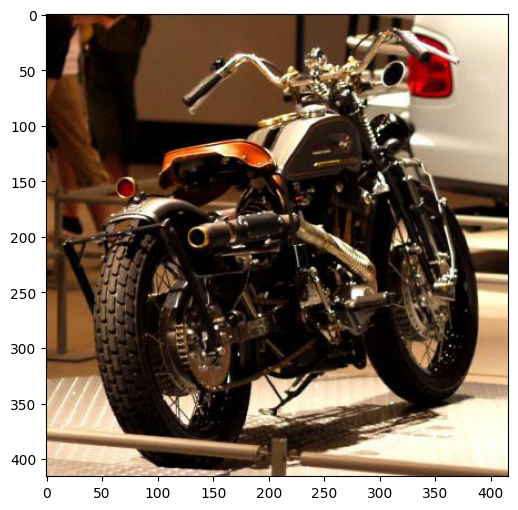

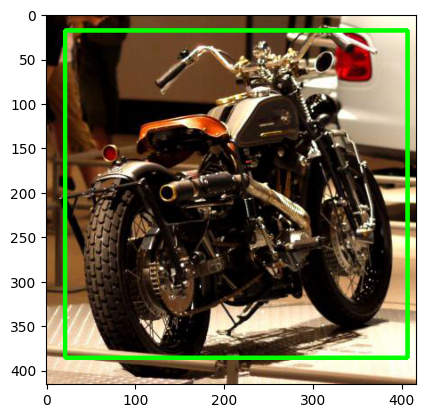

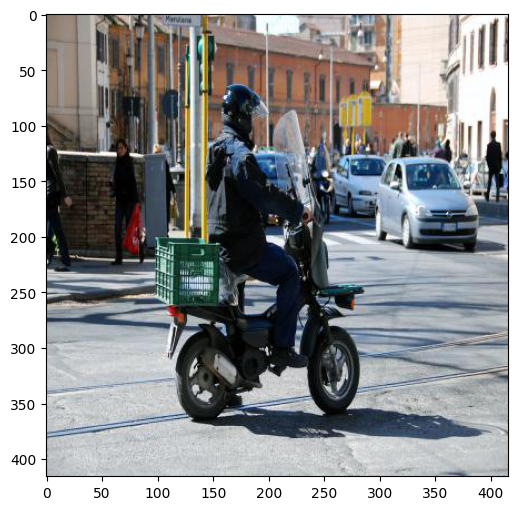

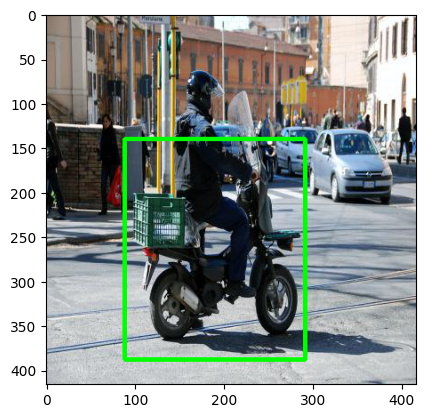

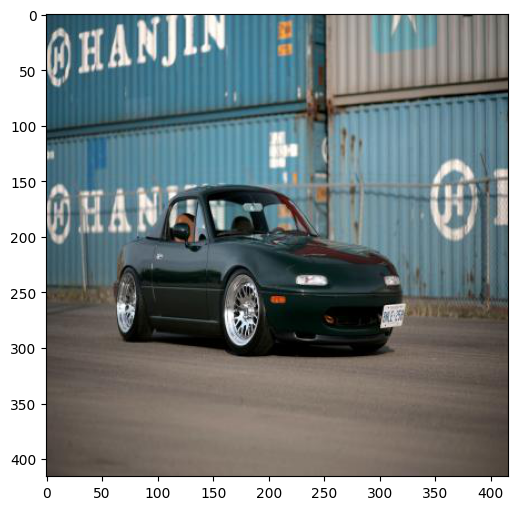

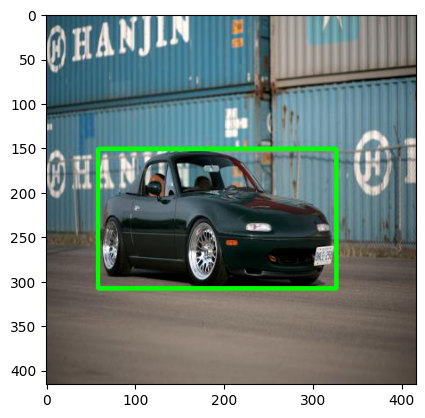

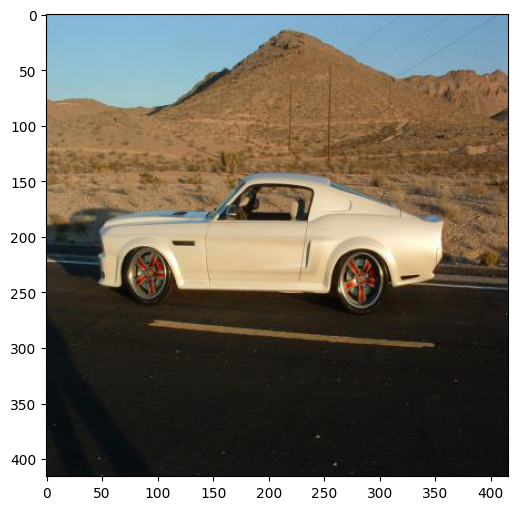

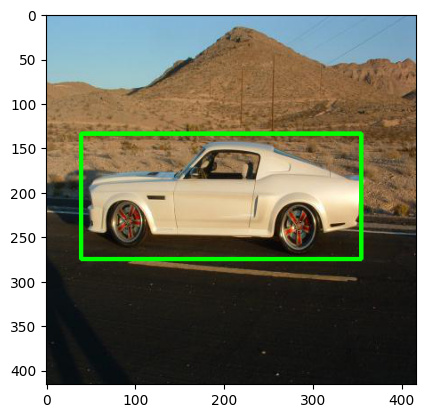

In [78]:

IMAGE_SHAPE = 0
for i in range(4):
  points={}
  points1={}
  rand = np.random.randint(0, data_valid.shape[0])
  random_row = data_valid.iloc[rand]
  rand_list= random_row[0]
  image = plt.imread(valid_dir +'/'+ rand_list.split(' ')[0])
  plt.figure(figsize=(8,6))
  plt.imshow(image)
  IMAGE_SHAPE = image.shape
  print(image.shape)
  list_values=rand_list.split(' ')
  print(rand_list)
  for i in range(1,len(list_values)):
    pnts=list_values[i].split(',')[:4]
    print(pnts)
    points["point{0}".format(i)] = int(pnts[0]), int(pnts[1])
    points1["point{0}".format(i)] = int(pnts[2]), int(pnts[3])
# print(points)
  for i,j in enumerate(points):
    cv2.rectangle(image,points[j], points1[j], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point2'], points1['point2'], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point3'], points1['point3'], color=(0, 255, 0), thickness=3)
  plt.figure()
  plt.imshow(image)


In [79]:
data_valid.shape
data_valid= data_valid[0].str.split(' ', expand=True)
data_valid.head()

0                 1   \
0   532953d0fc03d7ac_jpg.rf.zwev1qoVdbZlhhNFG7Do.jpg      0,10,49,50,2   
1   ac03aa25bc294ae9_jpg.rf.yhDIMFwNrWa52ylx6Z2I.jpg  68,104,307,332,0   
2   57876987d6d7944a_jpg.rf.yih5PS8JKYUcMxxc3zg6.jpg    1,132,60,325,1   
3   4a11e1503e4317a1_jpg.rf.xr2mlTpcmvzGODyFyQTf.jpg    36,0,416,415,1   
4  e667067350c180f2_jpg.rf.13de5c09063c58a3ba8da9...   27,20,354,369,1   

                  2                 3     4     5     6     7     8     9   \
0    30,40,384,348,2   216,12,277,47,2  None  None  None  None  None  None   
1               None              None  None  None  None  None  None  None   
2    15,75,194,350,1  186,28,416,378,1  None  None  None  None  None  None   
3               None              None  None  None  None  None  None  None   
4  350,110,416,259,1              None  None  None  None  None  None  None   

     10  
0  None  
1  None  
2  None  
3  None  
4  None

In [80]:
# data.iloc[:,1:10].str.split(',', expand=True)

Image_col= data_valid.iloc[:,0]
df_valid= pd.DataFrame()
df_valid= pd.concat([df_valid,Image_col])
df.head()
for i in range(1,11):
  df1_valid=data_valid.iloc[:,i].str.split(',', expand=True)
  # print(df1.head())
  df1_valid = df1_valid.rename(columns={
    0: 'x_min{0}'.format(i),
    1: 'y_min{0}'.format(i),
    2: 'x_max{0}'.format(i),
    3: 'y_max{0}'.format(i),
    4: 'class{0}'.format(i)
})
  df_valid= pd.concat([df_valid,df1_valid],axis=1)

In [81]:
df_valid.rename(columns={0:"Image Name"},inplace=True)

In [82]:
df_valid.fillna(0,inplace=True)
df_valid.head()

Image Name x_min1 y_min1 x_max1  \
0   532953d0fc03d7ac_jpg.rf.zwev1qoVdbZlhhNFG7Do.jpg      0     10     49   
1   ac03aa25bc294ae9_jpg.rf.yhDIMFwNrWa52ylx6Z2I.jpg     68    104    307   
2   57876987d6d7944a_jpg.rf.yih5PS8JKYUcMxxc3zg6.jpg      1    132     60   
3   4a11e1503e4317a1_jpg.rf.xr2mlTpcmvzGODyFyQTf.jpg     36      0    416   
4  e667067350c180f2_jpg.rf.13de5c09063c58a3ba8da9...     27     20    354   

  y_max1 class1 x_min2 y_min2 x_max2 y_max2  ... x_min9 y_min9 x_max9 y_max9  \
0     50      2     30     40    384    348  ...      0      0      0      0   
1    332      0      0      0      0      0  ...      0      0      0      0   
2    325      1     15     75    194    350  ...      0      0      0      0   
3    415      1      0      0      0      0  ...      0      0      0      0   
4    369      1    350    110    416    259  ...      0      0      0      0   

  class9 x_min10 y_min10 x_max10 y_max10 class10  
0      0       0       0       0       0       0  
1      0       0       0       0       0       0  
2      0       0       0       0       0       0  
3      0       0       0       0       0       0  
4      0       0       0       0       0       0  

[5 rows x 51 columns]

In [83]:
df_valid=df_valid.iloc[:,1:].astype('int32')
df_valid.head()

x_min1  y_min1  x_max1  y_max1  class1  x_min2  y_min2  x_max2  y_max2  \
0       0      10      49      50       2      30      40     384     348   
1      68     104     307     332       0       0       0       0       0   
2       1     132      60     325       1      15      75     194     350   
3      36       0     416     415       1       0       0       0       0   
4      27      20     354     369       1     350     110     416     259   

   class2  ...  x_min9  y_min9  x_max9  y_max9  class9  x_min10  y_min10  \
0       2  ...       0       0       0       0       0        0        0   
1       0  ...       0       0       0       0       0        0        0   
2       1  ...       0       0       0       0       0        0        0   
3       0  ...       0       0       0       0       0        0        0   
4       1  ...       0       0       0       0       0        0        0   

   x_max10  y_max10  class10  
0        0        0        0  
1        0        0        0  
2        0        0        0  
3        0        0        0  
4        0        0        0  

[5 rows x 50 columns]

In [84]:
im_h, im_w, num_chanels = IMAGE_SHAPE
for i in range(1,11):
  # x_center = "x_center{0}".format(str(i))
  # x_min    = "x_min{0}".format(str(i))
  # x_max    = "x_max{0}".format(str(i))
  # y_min    = "y_min{0}".format(str(i))
  # y_max    = "y_max{0}".format(str(i))
  # print(i)
  df_valid["x_center{0}".format(i)] = (df_valid["x_max{0}".format(i)] + df_valid["x_min{0}".format(i)])/2
  df_valid["y_center{0}".format(i)] = (df_valid["y_max{0}".format(i)] + df_valid["y_min{0}".format(i)])/2
  df_valid["w{0}".format(i)] = df_valid["x_max{0}".format(i)] - df_valid["x_min{0}".format(i)]
  df_valid["h{0}".format(i)] = df_valid["y_max{0}".format(i)] - df_valid["y_min{0}".format(i)]
  # df["classes"] = df["class{0}".format(i)]
  # #Normalizing the values with image height and width
  df_valid["x_center{0}".format(i)] = df_valid["x_center{0}".format(i)]/im_w
  df_valid["w{0}".format(i)] = df_valid["w{0}".format(i)]/im_w
  df_valid["y_center{0}".format(i)] = df_valid["y_center{0}".format(i)]/im_h
  df_valid["h{0}".format(i)] = df_valid["h{0}".format(i)]/im_h

In [85]:
df1_valid= pd.concat([data_valid[0],df_valid],axis=1)
df1_valid.rename(columns={0:'ImageName'},inplace=True)

In [99]:
df2_valid=df1_valid.copy()

In [100]:
df2_valid.head()

ImageName  x_min1  y_min1  x_max1  \
0   532953d0fc03d7ac_jpg.rf.zwev1qoVdbZlhhNFG7Do.jpg       0      10      49   
1   ac03aa25bc294ae9_jpg.rf.yhDIMFwNrWa52ylx6Z2I.jpg      68     104     307   
2   57876987d6d7944a_jpg.rf.yih5PS8JKYUcMxxc3zg6.jpg       1     132      60   
3   4a11e1503e4317a1_jpg.rf.xr2mlTpcmvzGODyFyQTf.jpg      36       0     416   
4  e667067350c180f2_jpg.rf.13de5c09063c58a3ba8da9...      27      20     354   

   y_max1  class1  x_min2  y_min2  x_max2  y_max2  ...   w8   h8  x_center9  \
0      50       2      30      40     384     348  ...  0.0  0.0        0.0   
1     332       0       0       0       0       0  ...  0.0  0.0        0.0   
2     325       1      15      75     194     350  ...  0.0  0.0        0.0   
3     415       1       0       0       0       0  ...  0.0  0.0        0.0   
4     369       1     350     110     416     259  ...  0.0  0.0        0.0   

   y_center9   w9   h9  x_center10  y_center10  w10  h10  
0        0.0  0.0  0.0         0.0         0.0  0.0  0.0  
1        0.0  0.0  0.0         0.0         0.0  0.0  0.0  
2        0.0  0.0  0.0         0.0         0.0  0.0  0.0  
3        0.0  0.0  0.0         0.0         0.0  0.0  0.0  
4        0.0  0.0  0.0         0.0         0.0  0.0  0.0  

[5 rows x 91 columns]

In [101]:
for i in range (1,11):
  df2_valid.drop(['x_min{0}'.format(i),'y_min{0}'.format(i),'x_max{0}'.format(i),'y_max{0}'.format(i)],axis=1,inplace=True)

In [102]:
# df2_valid.drop(["ImageName"],axis=1,inplace=True)

In [103]:
if not os.path.exists("/content/labels_valid"):
  os.makedirs("/content/labels_valid")

In [104]:
for name,mini in tqdm(df2_valid.groupby('ImageName')):
  if not os.path.exists("/content/labels_valid"):
    os.makedirs("/content/labels_valid")
    # df3=df2.copy()
    # df3.drop(['ImageName'],axis=1,inplace=True)
  with open("/content/labels_valid/{}".format(name)+".txt", 'w+') as f:
    for i in range (1,10):
      row = mini[['class{}'.format(i),'x_center{}'.format(i),'y_center{}'.format(i),'w{}'.format(i),'h{}'.format(i)]].\
      astype(float).values
      row = row.astype(str)
      print(row)
      for j in range(len(row)):
        text = ' '.join(row[j])
        f.write(text)
        f.write("\n")

  0%|          | 0/250 [00:00<?, ?it/s]

[['2.0' '0.038461538461538464' '0.8245192307692307' '0.07692307692307693'
  '0.34615384615384615']]
[['2.0' '0.17427884615384615' '0.47716346153846156' '0.3485576923076923'
  '0.2620192307692308']]
[['2.0' '0.4675480769230769' '0.3713942307692308' '0.05048076923076923'
  '0.06490384615384616']]
[['2.0' '0.6346153846153846' '0.42908653846153844' '0.15865384615384615'
  '0.23798076923076922']]
[['2.0' '0.8100961538461539' '0.7331730769230769' '0.3798076923076923'
  '0.5336538461538461']]
[['2.0' '0.7932692307692307' '0.359375' '0.03365384615384615'
  '0.08413461538461539']]
[['2.0' '0.9170673076923077' '0.3918269230769231' '0.1658653846153846'
  '0.1778846153846154']]
[['2.0' '0.8798076923076923' '0.2980769230769231' '0.019230769230769232'
  '0.03365384615384615']]
[['2.0' '0.9134615384615384' '0.29927884615384615' '0.019230769230769232'
  '0.016826923076923076']]
[['2.0' '0.038461538461538464' '0.8245192307692307' '0.07692307692307693'
  '0.34615384615384615']]
[['2.0' '0.17427884615384

In [107]:
# sh.move("/content/labels_train","/content/fold0/labels/")

'/content/fold0/labels/labels_train'

In [108]:
sh.move("/content/labels_valid","/content/fold0/labels/")

'/content/fold0/labels/labels_valid'

In [109]:
sh.move("/content/train","/content/fold0/images/")
sh.move("/content/valid","/content/fold0/images/")

'/content/fold0/images/valid'

In [146]:
%%writefile dataset.yaml
path: /content/fold0
train: /content/fold0/images/train
val: /content/fold0/images/valid
test:

names:
    {0:Ambulance,
    1:Bus,
    2:Car,
    3:Motorcycle,
    4:Truck}

Overwriting dataset.yaml


In [147]:
IMG_SIZE = IMAGE_SHAPE[1]
CONF_TRESHOLD = 0.6
IOU_THRESHOLD = 0.5
MODEL = 'yolov5x.pt'

In [148]:
import time

start = time.perf_counter()

!python /content/yolov5/train.py --batch 12 --epochs 12 --data dataset.yaml --weights {MODEL} --name my_model_5x

end = time.perf_counter()

total_time = end - start

print(f'Training time for {MODEL} model is: {total_time:0.2f} seconds')

2023-04-04 04:24:50.833829: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5x.pt, cfg=, data=dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=12, batch_size=12, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=my_model_5x, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-133-gcca5e21 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, 

In [113]:
!ls yolov5/runs/train/my_model_5x/

events.out.tfevents.1680580292.f17cacd3208f.20407.0  opt.yaml
hyp.yaml					     weights
